# Visualising data with `seaborn` and `matplotlib`

*October 20 2021*

We close the `python` introduction of our course with an introduction to data visualisation and plotting using the packages `pandas`, `matplotlib` and `seaborn`. A detailed coverage of the data visualisation techniques in each of those packages would deserve a whole lecture, so here we focus on the minimal basics and you should see this unit as a starting point for your own investigation.

## Data Visualisation with `pandas`

We have already introduced the data management features of `pandas` in unit P01-06. In fact, we can also use it to visualise the data in a `pandas` frame. Let us first import the package and generate a simple data frame:


In [1]:
import pandas as pd

data = pd.DataFrame({'val1': [0.75, 0.9, 0.4, 0.38], 'val2': [0.5, 0.58, 0.35, 0.32]})

C:\Users\ingos\Anaconda3\lib\site-packages\pandas\compat\_optional.py:138: UserWarning: Pandas requires version '2.7.0' or newer of 'numexpr' (version '2.6.9' currently installed).
  warnings.warn(msg, UserWarning)


Before we can start generating plots, let us also import the popular data visualisation package `matplotlib`, which we will introduce in more details below. The reason for this is that both `pandas` and `seaborn` build on the plotting features of `matplotlib`. Moreover, in Visual Studio Code the `matplotlib` backend will unfortunately default to a (very ugly) dark default plotting style, but for clarity here we prefer `matplotlib`'s default style. We can import the python plotting module `pyplot` from `matplotlib` and then set the default style using the function `plt.style.use`.

In [2]:
from matplotlib import pyplot as plt
plt.style.use('default')

Now we can directly call the plotting functions of the `DataFrame.plot` object. For instance, to generate a histogram that shows the frequencies of certain values (using automatic binning), we can call `hist` function. We can also combine this with a projection to specific columns in the data frame. Note that the `pandas.Series` object has a `plot` object as well, so we could have omitted the double bracket notation (in which case we plot a `Series` rather than a `DataFrame`).

<AxesSubplot:ylabel='Frequency'>

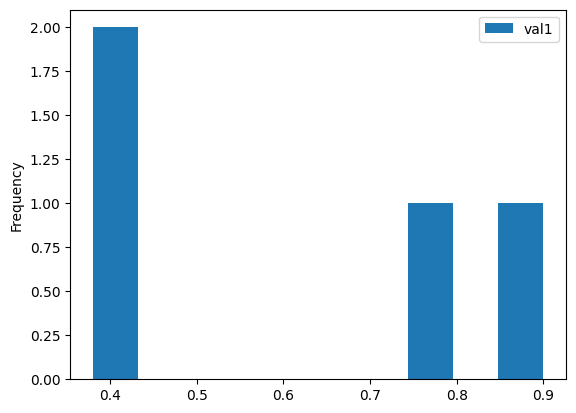

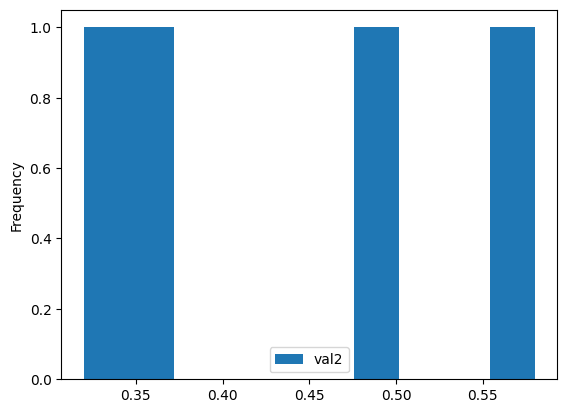

In [3]:
data[['val1']].plot.hist()
data[['val2']].plot.hist()

Conveniently, the resulting plots are directly shown inside the `juypter` notebook, i.e. we do not have to save and open them. We can also generate a scatter plot that shows entries in the data frame in terms of paired values, i.e. the values in the specified columns are interpreted as realisations of a multi-variate variable $(X, Y)$:

<AxesSubplot:xlabel='val1', ylabel='val2'>

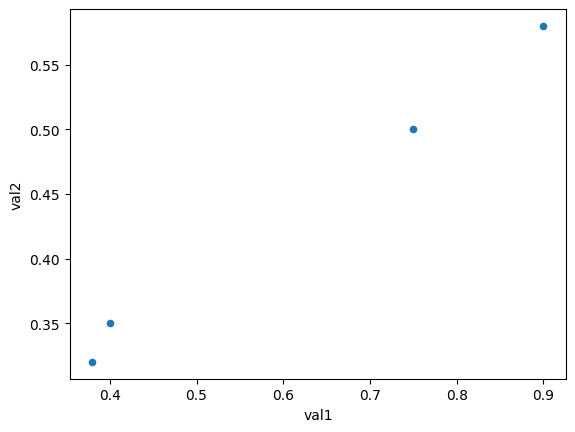

In [4]:
data.plot.scatter(x='val1', y='val2')

We can also create a bar plot that highlights all different values, including a legend for the different columns:

<AxesSubplot:>

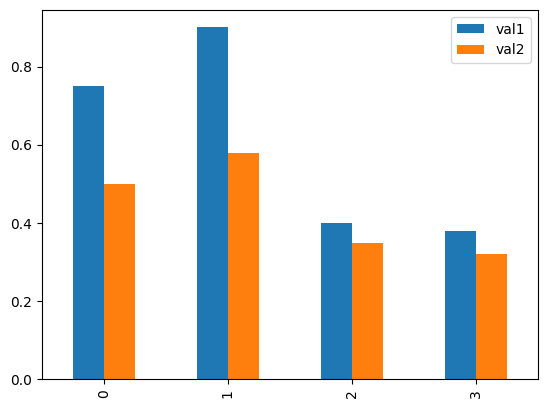

In [5]:
data.plot.bar()

Again, you should only see this as a starting point and you can find an introduction to data visualisation with `pandas` [here](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html).

## Data Visualisation with Seaborn

Apart from directly visualising data with `pandas`, we can use the popular package `seaborn`, which is specialised for statistical data visualisation. You can find the documentation as well as a gallery with examples (which is a great inspiration for data visualisation in general) [here](https://seaborn.pydata.org/). We first import the package and set a style. Seaborn comes with very nice default style, that generate professionally looking, professional-grade figures:

In [6]:
import seaborn as sns
sns.set(style="darkgrid")

C:\Users\ingos\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Seaborn provides many different ways to visualise data and here we focus on a few simple and common types. An appealing feature of `seaborn` is that it works hand-in-hand with pandas. For instance, we can create a scatter plot of two columns in a `pandas` data frame by simply passing the data frame as well as the name of the columns that should be plotted:

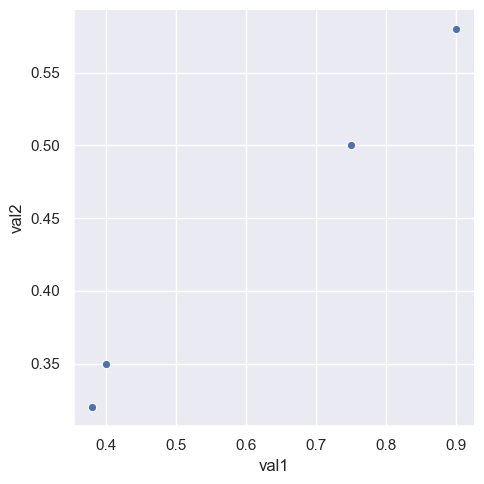

In [7]:
sns.relplot(x="val1", y="val2", data=data)

Seaborn is particularly good at plotting data that includes categorical variables. For instance, we can append a column with string labels to our data frame:

In [8]:
data['type'] = ['A', 'B', 'B', 'A']
print(data)

   val1  val2 type
0  0.75  0.50    A
1  0.90  0.58    B
2  0.40  0.35    B
3  0.38  0.32    A


To generate a scatter plot where data points with different categorical types are visualised by different colors, we can write:

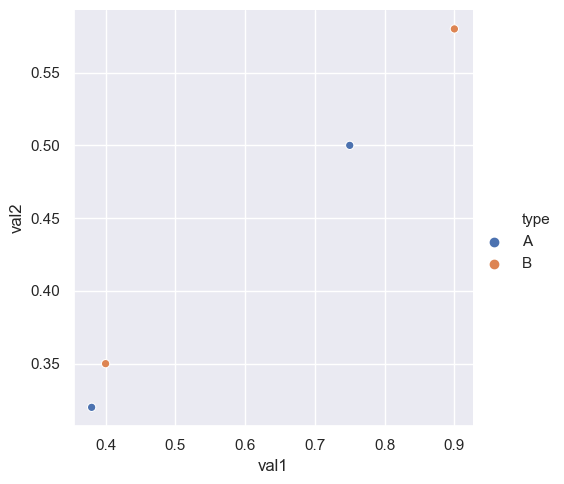

In [9]:
sns.relplot(x="val1", y="val2", hue='type', data=data)

We can even directly apply a linear regression, and visualise the data points, the fitted slope as well as the standard error of our estimate (more on this next week) as follows:

<AxesSubplot:xlabel='val1', ylabel='val2'>

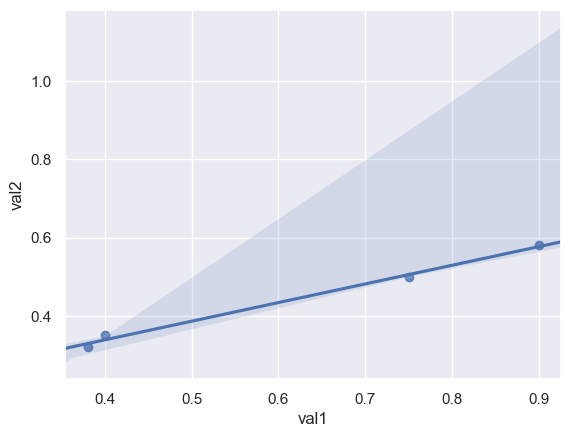

In [10]:
sns.regplot(x='val1', y='val2', data=data)

## Plotting with matplotlib

Both of the packages above built on `matplotlib`, a powerful data visualisation library that provides both high- and low-level interfaces to essentially fully control all aspects of the resulting figures. To produce a scatter plot with `matplotlib` we can use the `scatter` function in the module `plt`, which contains all of the plot functions that we will need. Here, we can pass the underlying Series objects that represent the columns in `pandas`.

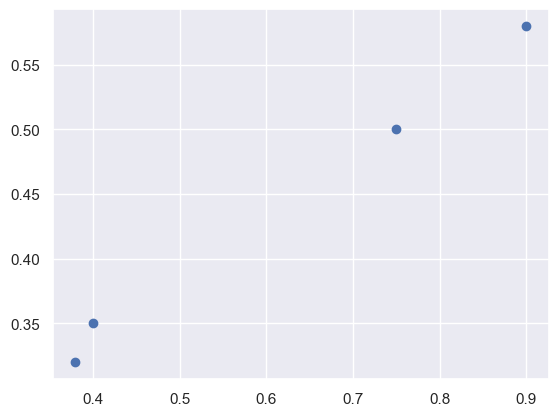

In [11]:
plt.scatter(data['val1'], data['val2'])

In general, any iterable object can be plotted, as long as the two iterables have the same length. The following works:

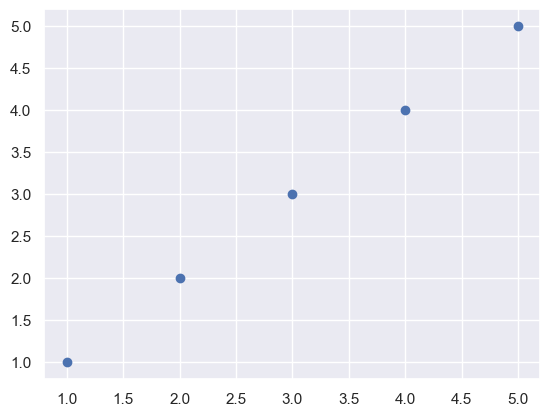

In [12]:
plt.scatter([1,2,3,4,5], [1,2,3,4,5])

But this fails:

ValueError: x and y must be the same size

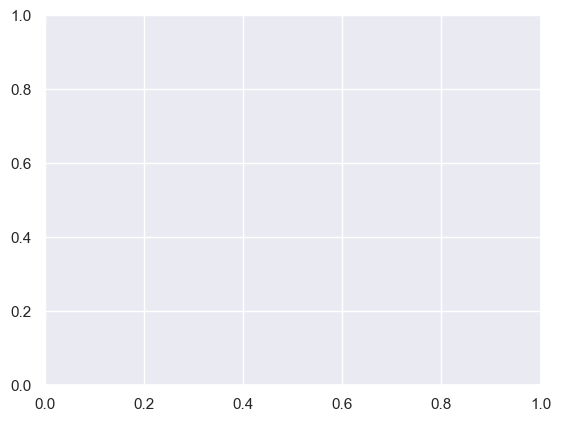

In [13]:
plt.scatter([1,2,3,4,5], [1,2,3,4])

Apart from scatter plots, we can also create line plots, using the `plot function`. The `c` argument controls the color of the line, the `lw` argument controls the width of the line, the `marker` argument controls the symbol used to visualise the actual data points (if any).

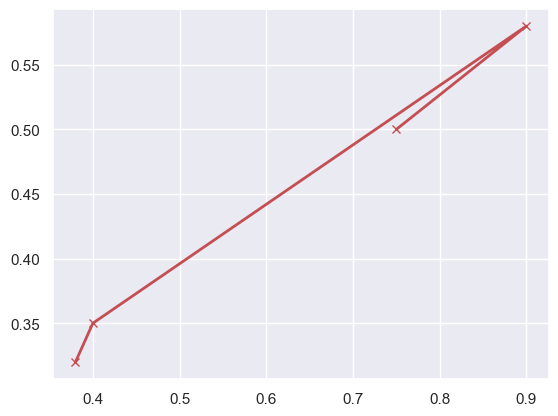

In [14]:
plt.plot(data['val1'], data['val2'], c='r', lw=2, marker='x')

Note that the data is used to generate line segments based on the ordering in which the data is given, i.e. if we want a contiguous plot in which the order of values does not matter, we need to sort the data frame.

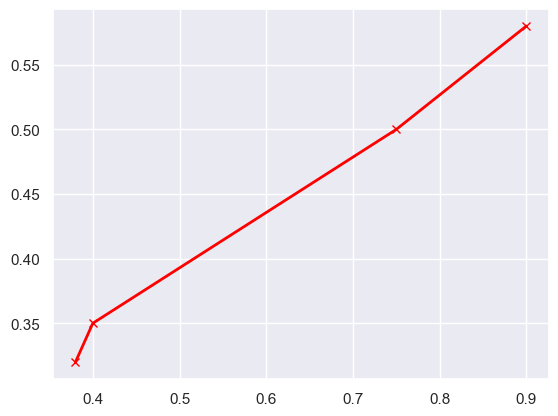

In [15]:
data_sorted = data.sort_values(by='val1')
plt.plot(data_sorted['val1'], data_sorted['val2'], c='red', lw=2, marker='x')

Note that the `plt` object is stateful, i.e. we can use it to access the current status of a plot. Above, the call to the `plot` function automatically generates a new empty figure to which the plot is added. Also, the `jupyter` integration automatically triggers the plotting of the current state at the end of a cell. However, we can issue multiple calls to `plot` to add multiple data to the same plot:

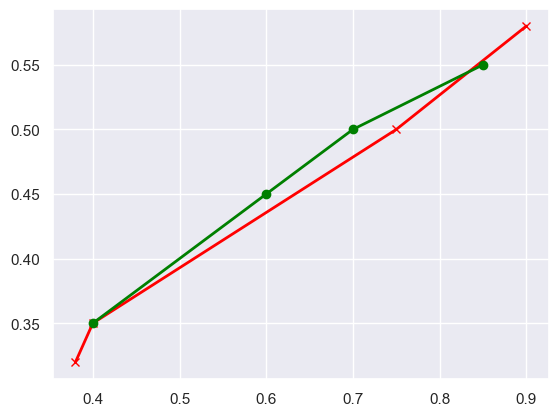

In [16]:
plt.plot(data_sorted['val1'], data_sorted['val2'], c='red', lw=2, marker='x')
plt.plot([0.4, 0.6, 0.7, 0.85], [0.35, 0.45, 0.5, 0.55], c='green', lw=2, marker='o')

We can also manually trigger the plotting or we can trigger that the current plot status is saved to a file (which can be either a png or a pdf file):

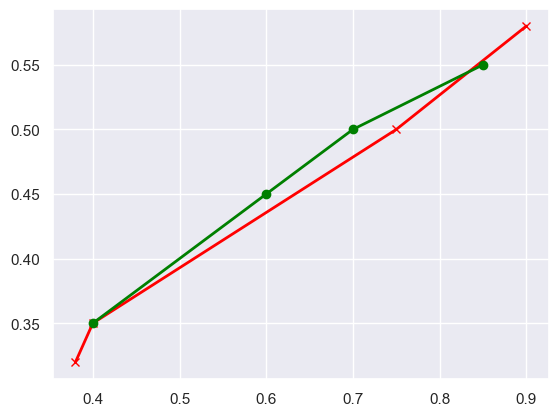

In [18]:
plt.plot(data_sorted['val1'], data_sorted['val2'], c='red', lw=2, marker='x')
plt.plot([0.4, 0.6, 0.7, 0.85], [0.35, 0.45, 0.5, 0.55], c='green', lw=2, marker='o')
plt.savefig('../data/plot.pdf')

We can add axis labels and control their appearance. Note that you can directly use LaTex math symbols in the axes labels:

Text(0, 0.5, '$val_2$')

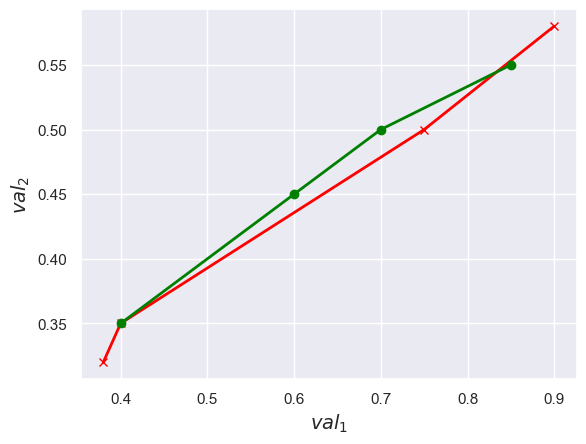

In [19]:
plt.plot(data_sorted['val1'], data_sorted['val2'], c='red', lw=2, marker='x')
plt.plot([0.4, 0.6, 0.7, 0.85], [0.35, 0.45, 0.5, 0.55], c='green', lw=2, marker='o')
plt.xlabel('$val_1$', fontsize=14)
plt.ylabel('$val_2$', fontsize=14)

Finally, we can control all details of a plot by using the underlying `figure` and `axes` objects. In fact, the functions implemented in the `pyplot` object are simply wrappers around these functions and for advanced visualisation projects it is typically preferrable to directly access the lower level functions. The easiest way is to manually create them using the `subplot` function. We can then use the extensive list of functions implemented by the `figure` and `axes` objects to control the details of our plot:

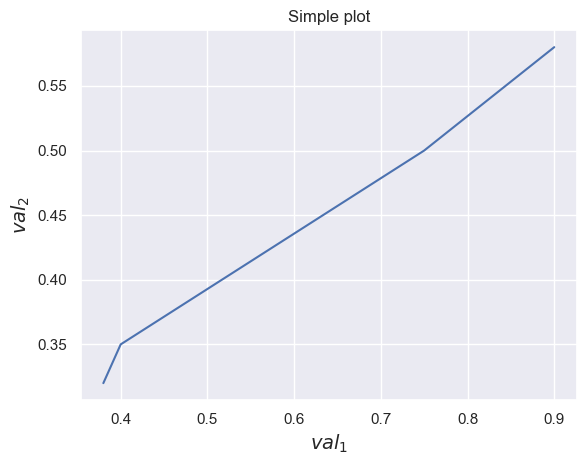

In [21]:
fig, ax = plt.subplots()
ax.plot(data_sorted['val1'], data_sorted['val2'])
ax.set_title('Simple plot')
ax.set_xlabel('$val_1$', fontsize=14)
ax.set_ylabel('$val_2$', fontsize=14)
fig.savefig('../data/myplot.pdf')

Finally, we show how we can add multiple plots to a single figure. This also highlights the point of distinguishing between two objects that control the visualisation that we create. In fact, the `figure` object controls all aspects of the whole figure (e.g. independent on individual plots), while the `axes` object controls those aspects that are related to specific plots. We illustrate this in a more complex example, that demonstrates some advanced functions.

In this example, we use the `subplots` function to create a figure that contains four subplots, organized in two rows and columns. This will return two objects where the first is the figure object that will contain all the plots, while the second is a 2xx2 array of axes objects, that we can use to control the four plots. 

We can now use the different functions of the axes to add our plots. In the example below, we use the implementation of probability mass functions and probability density functions to generate four plots of probability distributions. We also use `numpy`'s `linspace` and `arange` functions to generate values for the x-axes that match the domain of the distributions. Note that `arange` generates a list of integer values from the include lower to the exclusive upper bound. `linspace` will sample $n$ evenly spaced points within the given interval. We then pass the x-values in the resulting `numpy` arrays to the corresponding `pmf` and `pdf` functions to obtain the function values that should be plotted. 

In the example, each plot also adds a string label, which can be used in the figure legend. In the label, we use LaTex formulas that include a backslash, which would usually interpreted as an escape character by python. We prevent this by prefing the string with an `r`. This stands for `raw` and it will prevent python from intepreting backslashes as escape characters. We finally save the figure as a pdf file.

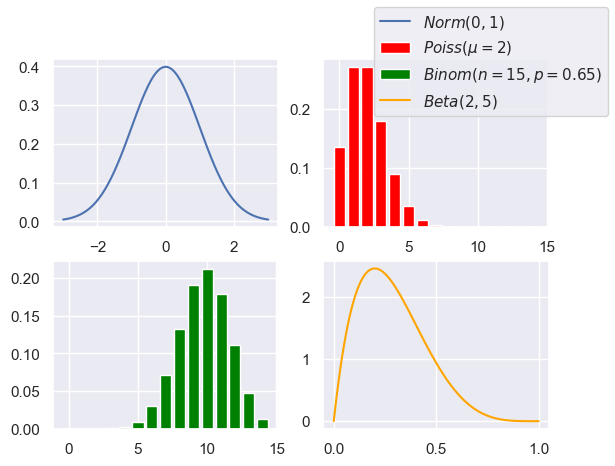

In [22]:
import numpy as np
import scipy

x_norm = np.linspace(-3, 3, 100)
x_poiss = np.arange(0, 15)
x_binom = np.arange(0, 15)
x_beta = np.linspace(0,1, 100)

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2)
ax1.plot(x_norm, scipy.stats.norm.pdf(x_norm), label=r'$Norm(0,1)$')
ax2.bar(x_poiss, scipy.stats.poisson.pmf(x_poiss, mu=2), color='red', label=r'$Poiss(\mu=2)$')
ax3.bar(x_binom, scipy.stats.binom.pmf(x_binom, n=15, p=0.65), color='green', label=r'$Binom(n=15, p=0.65)$')
ax4.plot(x_beta, scipy.stats.beta.pdf(x_beta, a=2, b=5), color='orange', label=r'$Beta(2,5)$')
fig.legend()
fig.savefig('../data/distributions.pdf')

That concludes our short introduction to data visualisation with `pandas`, `seaborn`, and `matplotlib`. I invite you to further advance your data visualisation skills based on the tutorials referenced above.